# Prolexitim Analytics 
## TAS-20 Data. Descriptive and Correlational Analysis
### Dataset from Prolexitim TAS-20 Spain instrument
<hr>
May 2019.<br> Prolexitim dataset version 1.1 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>

### This notebook contains: 

- TAS-20 Dataset loading. 
- TAS-20 Dataset categorical variable definition
- TAS-20 Dataset export. 
- TAS-20 Data Descriptive Analysis
- TAS-20 Data Probability Distribution Analysis
- TAS-20 Data Correlational Analysis

## Loading TAS-20 dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd 
from scipy import stats
import seaborn as sns

tas_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-tas-1.1.csv"

tas_df = pd.read_csv(tas_dataset_path,header=0,delimiter="\t") 

In [2]:
# Check
# tas_df.count()
tas_df = tas_df.drop(columns="Unnamed: 0");

In [3]:
tas_df.head()

,NLP,Code,TAS20,F1,F2,F3,Tas20Time,Sex,Gender,Age,Dhand,Studies,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job
0,0,be8f0c722d0a0f4cd9d92c503e6f7583,42,16,10,16,254305,1,1,21,1,5,2,6,2,ES,ES,-1,Iberic,Psychology
1,1,608af5455da8c250a87f81a5ed5c1942,55,15,20,15,103425,1,1,42,2,7,2,5,5,ES,ES,-1,Iberic,Psychology
2,1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,201637,2,2,22,1,5,2,2,2,ES,ES,-1,Iberic,Psychology
3,0,a2caa2eaccf99705bf39f6aeaee00ee3,40,13,10,17,242202,2,2,22,1,5,2,3,1,ES,ES,-1,Iberic,Psychology
4,1,20cd825cadb95a71763bad06e142c148,40,12,10,18,155945,2,2,22,1,5,2,1,1,ES,ES,-1,Iberic,Psychology


In [4]:
tas_df['Sex'] = tas_df['Sex'].replace(1, 'Hombre')
tas_df['Sex'] = tas_df['Sex'].replace(2, 'Mujer')
tas_df['Gender'] = tas_df['Gender'].replace(1, 'Hombre')
tas_df['Gender'] = tas_df['Gender'].replace(2, 'Mujer')

In [5]:
tas_df.head()

,NLP,Code,TAS20,F1,F2,F3,Tas20Time,Sex,Gender,Age,Dhand,Studies,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job
0,0,be8f0c722d0a0f4cd9d92c503e6f7583,42,16,10,16,254305,Hombre,Hombre,21,1,5,2,6,2,ES,ES,-1,Iberic,Psychology
1,1,608af5455da8c250a87f81a5ed5c1942,55,15,20,15,103425,Hombre,Hombre,42,2,7,2,5,5,ES,ES,-1,Iberic,Psychology
2,1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,201637,Mujer,Mujer,22,1,5,2,2,2,ES,ES,-1,Iberic,Psychology
3,0,a2caa2eaccf99705bf39f6aeaee00ee3,40,13,10,17,242202,Mujer,Mujer,22,1,5,2,3,1,ES,ES,-1,Iberic,Psychology
4,1,20cd825cadb95a71763bad06e142c148,40,12,10,18,155945,Mujer,Mujer,22,1,5,2,1,1,ES,ES,-1,Iberic,Psychology


In [6]:
# Make sure to have propper categorial variables. 
tas_df['Sex'] = pd.Categorical(tas_df['Sex'])
tas_df['Gender'] = pd.Categorical(tas_df['Gender'])
tas_df['Dhand'] = pd.Categorical(tas_df['Dhand'])
tas_df['Studies'] = pd.Categorical(tas_df['Studies'])
tas_df['SClass'] = pd.Categorical(tas_df['SClass'])
tas_df['SibPos'] = pd.Categorical(tas_df['SibPos'])

## Descriptive Analysis

In [7]:
tas_df.describe()

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000
mean,0.647541,45.016393,15.573770,12.696721,16.655738,2.664435e+05,34.942623,2.622951,0.909836
std,0.479706,10.101128,4.837727,4.195411,3.928641,2.169045e+05,12.459056,1.356514,7.425669
min,0.000000,25.000000,7.000000,5.000000,7.000000,1.152700e+04,13.000000,1.000000,-1.000000
25%,0.000000,38.000000,12.000000,10.000000,14.000000,1.562112e+05,24.000000,2.000000,-1.000000
50%,1.000000,43.000000,14.000000,12.000000,16.500000,2.158395e+05,33.500000,2.000000,-1.000000
75%,1.000000,49.000000,18.000000,16.000000,19.000000,2.930908e+05,43.000000,3.000000,-1.000000
max,1.000000,72.000000,29.000000,23.000000,28.000000,1.954750e+06,81.000000,8.000000,53.000000


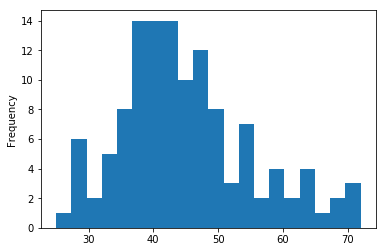

In [8]:
tas_df['TAS20'].plot.hist(by=None, bins=20)

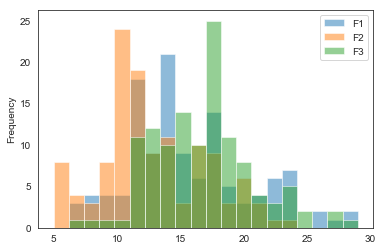

In [9]:
sns.set_style("white")
tas_df[['F1','F2','F3']].plot.hist(by=None, bins=20, alpha=0.5)

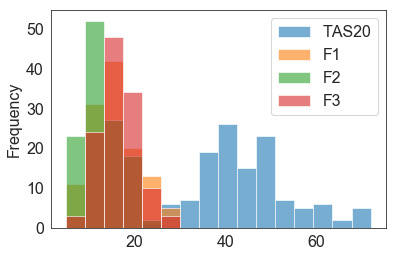

In [10]:
plt.rcParams.update({'font.size': 16})
sns.set_style("white")
tas_df[['TAS20','F1','F2','F3']].plot.hist(by=None, bins=16, alpha=0.6)

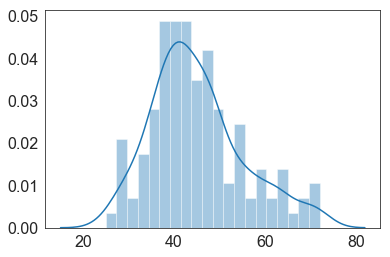

In [11]:
sns.distplot(tas_df[["TAS20"]], bins=20, kde=True)

### Normal distribution testing

In [12]:
# Normal distribution test
def normality(x, name, alpha=1e-3):
    k2, p = stats.normaltest(x)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected. " + name + " is NOT a normal distribution.")
    else:
         print("The null hypothesis cannot be rejected. " + name + " IS a normal distribution.")

In [13]:
normality(tas_df["TAS20"], "TAS-20")
normality(tas_df["F1"], "F1")
normality(tas_df["F2"], "F2")
normality(tas_df["F3"], "F3")
normality(tas_df["Age"], "Age")
normality(tas_df["Tas20Time"], "RT")

p = 0.00956064
The null hypothesis cannot be rejected. TAS-20 IS a normal distribution.
p = 0.0346887
The null hypothesis cannot be rejected. F1 IS a normal distribution.
p = 0.100829
The null hypothesis cannot be rejected. F2 IS a normal distribution.
p = 0.0947657
The null hypothesis cannot be rejected. F3 IS a normal distribution.
p = 0.00213647
The null hypothesis cannot be rejected. Age IS a normal distribution.
p = 4.9316e-35
The null hypothesis can be rejected. RT is NOT a normal distribution.


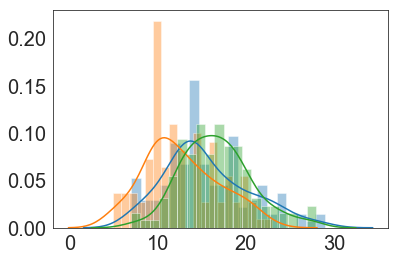

In [14]:
plt.rcParams.update({'font.size': 20})
sns.distplot(tas_df[["F1"]], bins=20, kde=True)
sns.distplot(tas_df[["F2"]], bins=20, kde=True)
sns.distplot(tas_df[["F3"]], bins=20, kde=True)

### Difference of means testing

In [15]:
# One way ANOVA for F1, F2 and F3
from scipy.stats import f_oneway

stat, p = f_oneway(tas_df["F1"], tas_df["F2"], tas_df["F3"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=27.152, p=0.000
Different distributions (reject H0)


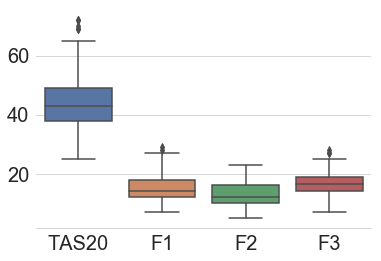

In [16]:
sns.set_style("whitegrid")
sns.boxplot(data=tas_df[["TAS20","F1","F2","F3"]], palette="deep")
sns.despine(left=True)

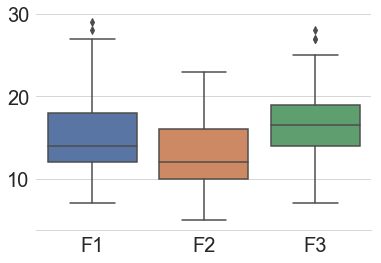

In [17]:
sns.set_style("whitegrid")
sns.boxplot(data=tas_df[["F1","F2","F3"]], palette="deep")
plt.rcParams.update({'font.size': 20})
sns.despine(left=True)

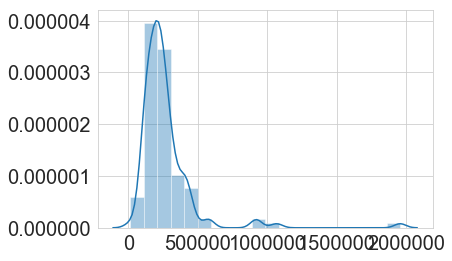

In [18]:
sns.distplot(tas_df[["Tas20Time"]], bins=20, kde=True)

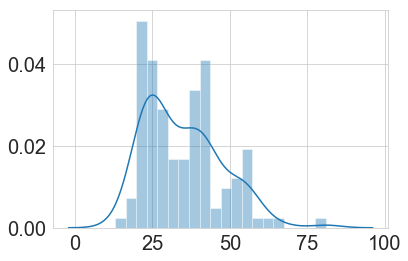

In [19]:
sns.distplot(tas_df[["Age"]], bins=20, kde=True)

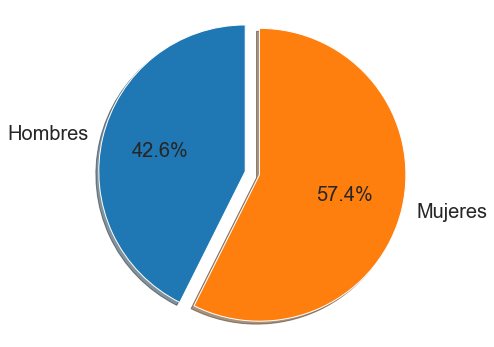

In [20]:
labels = 'Hombres', 'Mujeres'
sizes = [tas_df['Sex'].value_counts()['Hombre'], \
        tas_df['Sex'].value_counts()['Mujer']]
explode = (0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [21]:
# Sex stats
tas_df["Sex"].describe()

count       122
unique        2
top       Mujer
freq         70
Name: Sex, dtype: object

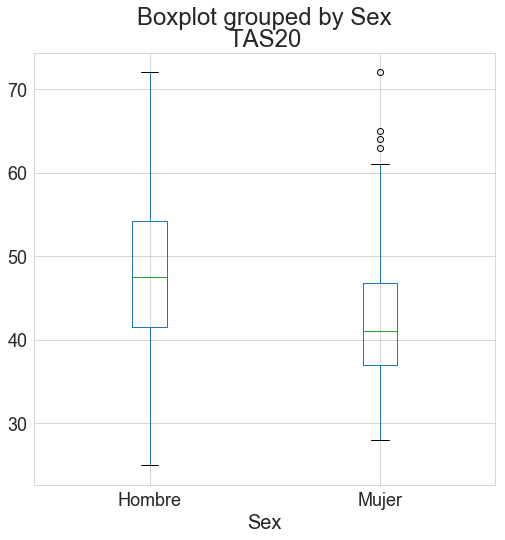

In [22]:
# Sex stats
tas_df.boxplot(by='Sex', column="TAS20", figsize=[8,8], fontsize=18)

In [23]:
# T test for mean TAS20 difference in sex

from scipy.stats import ttest_ind, ttest_rel

hombres = tas_df[tas_df['Sex']=='Hombre']
mujeres = tas_df[tas_df['Sex']=='Mujer']

ttest_ind(hombres['TAS20'], mujeres['TAS20'])

Ttest_indResult(statistic=2.678382583333671, pvalue=0.008435244803050121)

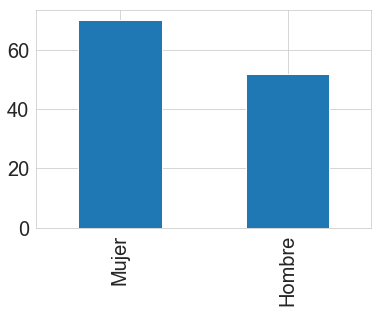

In [24]:
tas_df['Sex'].value_counts().plot(kind='bar')

In [25]:
# Effect size calculation Cohen's D:

from statistics import mean, stdev
from math import sqrt

sex_cohens_d = (mean(hombres['TAS20']) - mean(mujeres['TAS20'])) / (sqrt((stdev(hombres['TAS20']) ** 2 + stdev(mujeres['TAS20']) ** 2) / 2))

In [62]:
sex_cohens_d

0.48249236734981266

In [26]:
# Gender stats
tas_df["Gender"].value_counts()

Mujer     68
Hombre    51
3          3
Name: Gender, dtype: int64

In [27]:
# Dominant hand stats
tas_df["Dhand"].value_counts()

1    114
2      5
3      3
Name: Dhand, dtype: int64

In [28]:
# Studies stats
tas_df["Studies"].value_counts()

5    57
6    44
7     8
4     6
3     5
2     1
1     1
Name: Studies, dtype: int64

In [29]:
# Social Class stats
tas_df["SClass"].value_counts()

2    112
3      7
1      3
Name: SClass, dtype: int64

In [30]:
# Siblings position stats
tas_df["SibPos"].value_counts()

1    50
2    43
3    19
4     5
5     4
8     1
Name: SibPos, dtype: int64

## Build categorical TAS variable
### Cutoff scoring: 

- Equal to or less than 51 = non-alexithymia.
- Scores of 52 to 60 = possible alexithymia.
- Equal to or greater than 61 = alexithymia. 

*Bagby, R. M., Parker, J. D. A. & Taylor, G. J. (1994). The twenty-item Toronto Alexithymia Scale-I. Item selection and cross-validation of the factor structure. Journal of Psychosomatic Research, 38, 23-32.*

**Other cutoff scorings can be considered:**

- Score less that 44 for non-alexithymia has been also considered. 
- Scores of 45 to 55 = possible alexithymia. 
- Equal to or greater than 56 = alexithymia. 

*Loas, G., Otmani, O., Fremaux, D., Lecercle, C., Duflot, M., & Delahousse, J. (1996). External validity, reliability and basic score determination of the Toronto Alexithymia Scales (TAS and TAS-20) in a group of alcoholic patients. L'Encephale, 22(1), 35-40.*


In [31]:
# Adding two new columns (TAS-20 categorical label)

tas_df.insert(loc=len(tas_df.columns), column='alex-a', value="") # Standard cutoff
tas_df.insert(loc=len(tas_df.columns), column='alex-b', value="") # Diagnosis validity maximized 


In [32]:
# tas_df.dtypes

In [33]:
# Define TAS-20 Diagnosis Labels
Label_NoAlex = "NoAlex"
Label_PossibleAlex = "PosAlex"
Label_Alex = "Alex"

In [34]:
# TAS-20 Score to Label according to Bagby et al. 
def getAlex_a_label(score):
    label = Label_NoAlex
    if score > 60:
        label = Label_Alex
    else:
        if score > 51:
            label = Label_PossibleAlex        
    return label

# TAS-20 Score to Label according to Loas et al. 
def getAlex_b_label(score):
    label = Label_NoAlex
    if score > 55:
        label = Label_Alex
    else:
        if score > 44:
            label = Label_PossibleAlex        
    return label

In [35]:
# Generate the labels: 

for index, row in tas_df.iterrows():
    tas_df.at[index, "alex-a"] = getAlex_a_label(row["TAS20"])
    tas_df.at[index, "alex-b"] = getAlex_b_label(row["TAS20"])


In [36]:
# Make sure they are considered categorical variables

tas_df['alex-a'] = pd.Categorical(tas_df['alex-a'])
tas_df['alex-b'] = pd.Categorical(tas_df['alex-b'])

In [37]:
tas_df[["TAS20","alex-a"]]

,TAS20,alex-a
0,42,NoAlex
1,55,PosAlex
2,40,NoAlex
3,40,NoAlex
4,40,NoAlex
5,37,NoAlex
6,45,NoAlex
7,33,NoAlex
8,38,NoAlex
9,40,NoAlex


In [38]:
tas_df["alex-a"].value_counts()

NoAlex     97
PosAlex    13
Alex       12
Name: alex-a, dtype: int64

In [39]:
tas_df.groupby(["Sex", "alex-a"]).describe()

NLP                                              TAS20  \
               count      mean       std  min  25%  50%  75%  max count   
Sex    alex-a                                                             
Hombre Alex      7.0  0.857143  0.377964  0.0  1.0  1.0  1.0  1.0   7.0   
       NoAlex   37.0  0.459459  0.505228  0.0  0.0  0.0  1.0  1.0  37.0   
       PosAlex   8.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   8.0   
Mujer  Alex      5.0  0.400000  0.547723  0.0  0.0  0.0  1.0  1.0   5.0   
       NoAlex   60.0  0.716667  0.454420  0.0  0.0  1.0  1.0  1.0  60.0   
       PosAlex   5.0  0.600000  0.547723  0.0  0.0  1.0  1.0  1.0   5.0   

                           ... Siblings      Rtime                           \
                     mean  ...      75%  max count      mean       std  min   
Sex    alex-a              ...                                                
Hombre Alex     66.857143  ...      3.0  4.0   7.0  1.285714  4.855042 -1.0   
       NoAlex   42.378378  ...      3.0  7.0  37.0  1.756757  9.852821 -1.0   
       PosAlex  56.125000  ...      4.0  5.0   8.0 -1.000000  0.000000 -1.0   
Mujer  Alex     65.000000  ...      3.0  8.0   5.0  0.200000  1.788854 -1.0   
       NoAlex   40.033333  ...      3.0  6.0  60.0  0.816667  7.065053 -1.0   
       PosAlex  56.000000  ...      4.0  5.0   5.0 -1.000000  0.000000 -1.0   

                                     
                25%  50%  75%   max  
Sex    alex-a                        
Hombre Alex    -1.0 -1.0  0.5  12.0  
       NoAlex  -1.0 -1.0 -1.0  53.0  
       PosAlex -1.0 -1.0 -1.0  -1.0  
Mujer  Alex    -1.0 -1.0  1.0   3.0  
       NoAlex  -1.0 -1.0 -1.0  47.0  
       PosAlex -1.0 -1.0 -1.0  -1.0  

[6 rows x 72 columns]

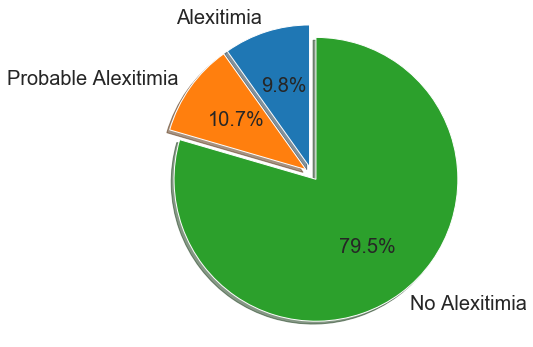

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'Alexitimia', 'Probable Alexitimia', 'No Alexitimia'
sizes = [tas_df['alex-a'].value_counts()[Label_Alex], \
        tas_df['alex-a'].value_counts()[Label_PossibleAlex],
        tas_df['alex-a'].value_counts()[Label_NoAlex]]
explode = (0.05, 0.05, 0.05)
plt.rcParams.update({'font.size': 20})
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

In [41]:
tas_df["alex-b"].value_counts()

NoAlex     66
PosAlex    38
Alex       18
Name: alex-b, dtype: int64

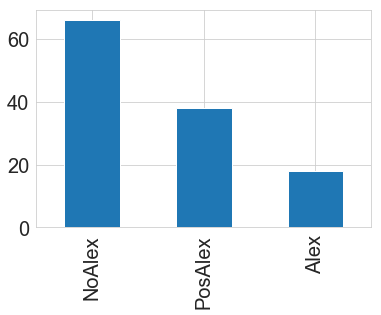

In [42]:
tas_df['alex-b'].value_counts().plot(kind='bar')

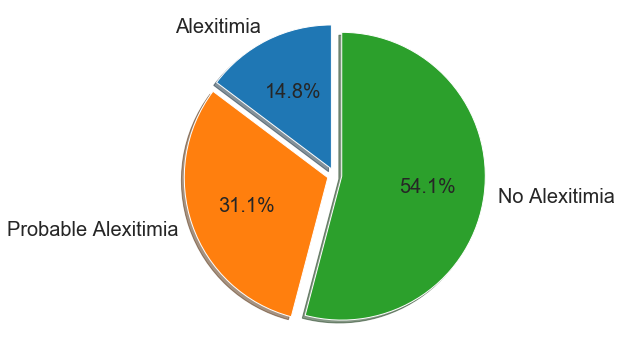

In [43]:
labels = 'Alexitimia', 'Probable Alexitimia', 'No Alexitimia'
sizes = [tas_df['alex-b'].value_counts()[Label_Alex], \
        tas_df['alex-b'].value_counts()[Label_PossibleAlex],
        tas_df['alex-b'].value_counts()[Label_NoAlex]]
explode = (0.05, 0.05, 0.05)

fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

In [44]:
# tas_df

### Export CVS with TAS categorical variables

In [45]:
# tas_df = tas_df.drop(columns="Unnamed: 0");

In [46]:
# Dataset with categorical variables
new_tas_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-tas-1.2.csv"
tas_df.to_csv(new_tas_dataset_path, sep='\t', encoding='utf-8', index=False)

## Correlational Analysis

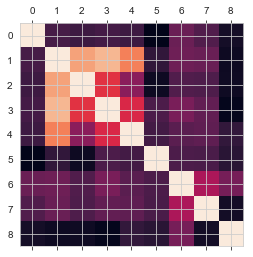

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(tas_df.corr())
plt.show()

In [48]:
corr = tas_df.corr()
corr

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
NLP,1.000000,0.066014,0.038006,0.061428,0.040330,-0.145782,0.169436,0.098896,-0.080918
TAS20,0.066014,1.000000,0.788935,0.846683,0.696351,0.004348,0.180531,0.163907,-0.101568
F1,0.038006,0.788935,1.000000,0.509083,0.256164,-0.103901,0.096943,0.091169,-0.099544
F2,0.061428,0.846683,0.509083,1.000000,0.477980,0.084155,0.208367,0.146740,-0.130872
F3,0.040330,0.696351,0.256164,0.477980,1.000000,0.059130,0.124369,0.139824,0.007143
Tas20Time,-0.145782,0.004348,-0.103901,0.084155,0.059130,1.000000,0.083270,0.082187,-0.019205
Age,0.169436,0.180531,0.096943,0.208367,0.124369,0.083270,1.000000,0.345407,0.201828
Siblings,0.098896,0.163907,0.091169,0.146740,0.139824,0.082187,0.345407,1.000000,-0.083807
Rtime,-0.080918,-0.101568,-0.099544,-0.130872,0.007143,-0.019205,0.201828,-0.083807,1.000000


In [49]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
NLP,1,0.066,0.038,0.061,0.04,-0.15,0.17,0.099,-0.081
TAS20,0.066,1,0.79,0.85,0.7,0.0043,0.18,0.16,-0.1
F1,0.038,0.79,1,0.51,0.26,-0.1,0.097,0.091,-0.1
F2,0.061,0.85,0.51,1,0.48,0.084,0.21,0.15,-0.13
F3,0.04,0.7,0.26,0.48,1,0.059,0.12,0.14,0.0071
Tas20Time,-0.15,0.0043,-0.1,0.084,0.059,1,0.083,0.082,-0.019
Age,0.17,0.18,0.097,0.21,0.12,0.083,1,0.35,0.2
Siblings,0.099,0.16,0.091,0.15,0.14,0.082,0.35,1,-0.084
Rtime,-0.081,-0.1,-0.1,-0.13,0.0071,-0.019,0.2,-0.084,1


In [50]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

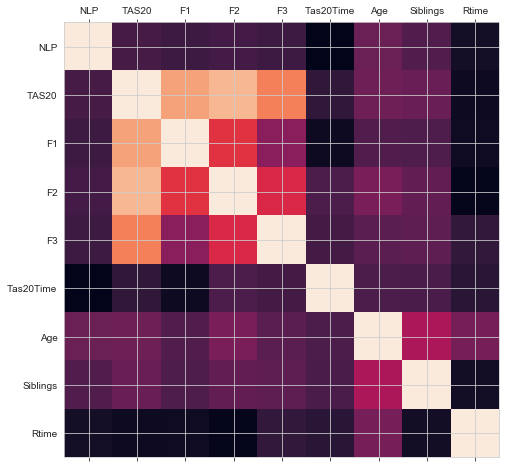

In [51]:
plot_corr(tas_df, 8)

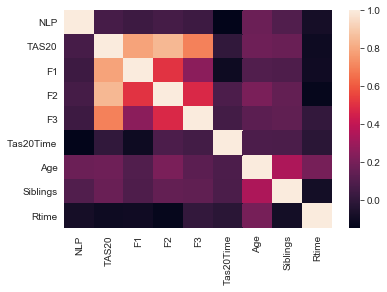

In [52]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

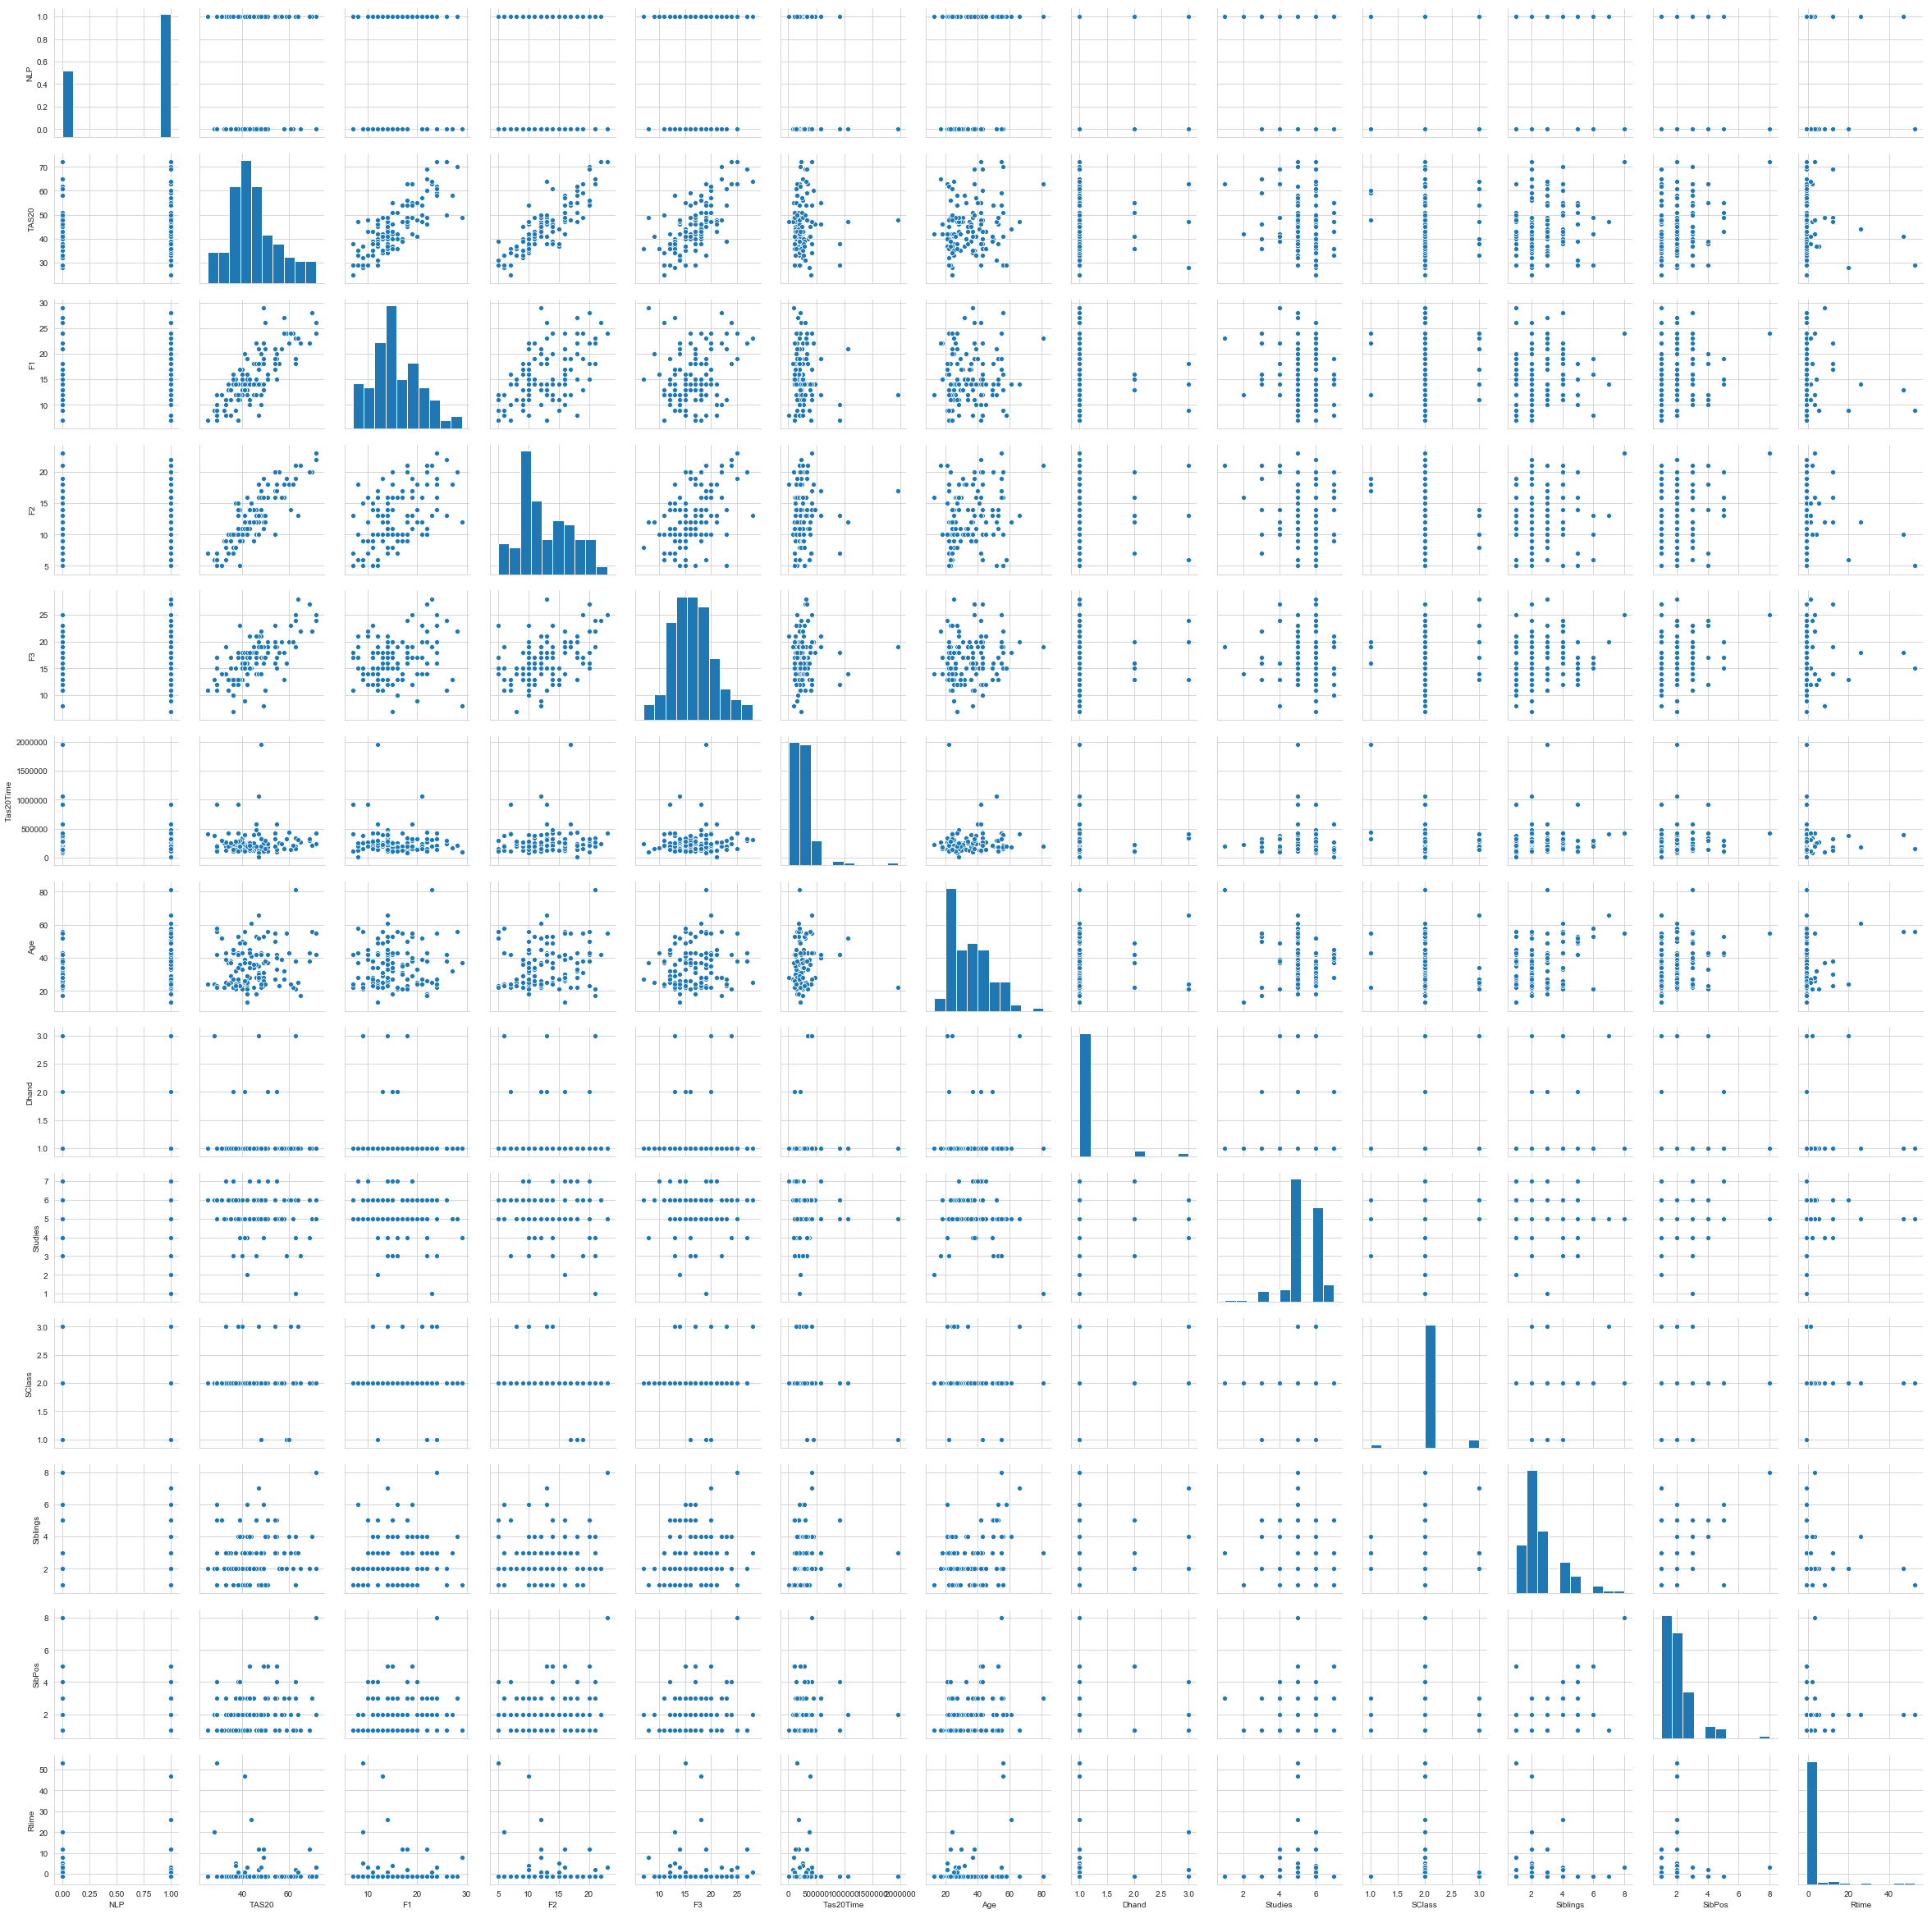

In [53]:
sns.pairplot(tas_df)

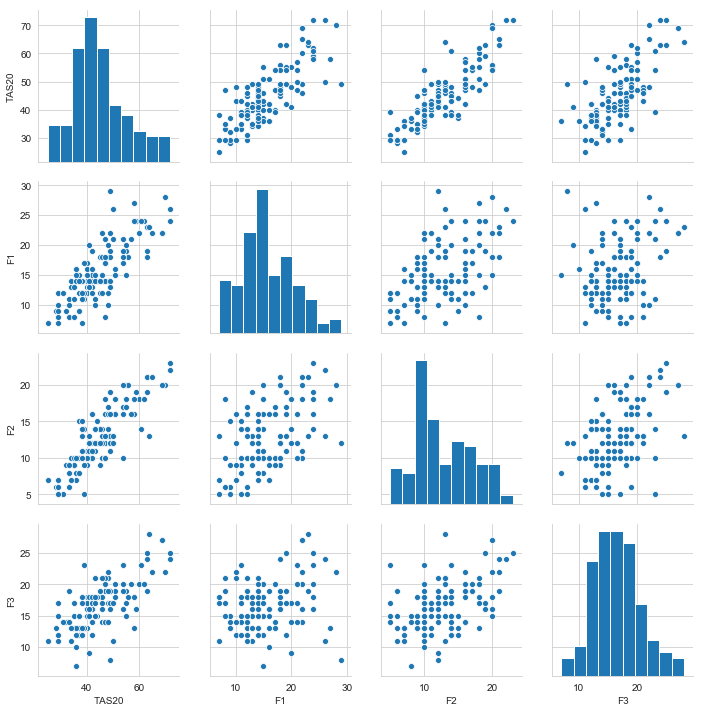

In [54]:
sns.pairplot(tas_df[["TAS20", "F1", "F2", "F3"]])

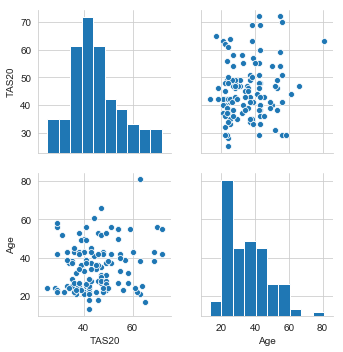

In [55]:

sns.pairplot(tas_df[["TAS20", "Age"]])

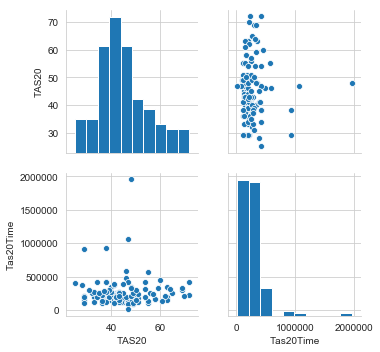

In [56]:
sns.pairplot(tas_df[["TAS20", "Tas20Time"]])

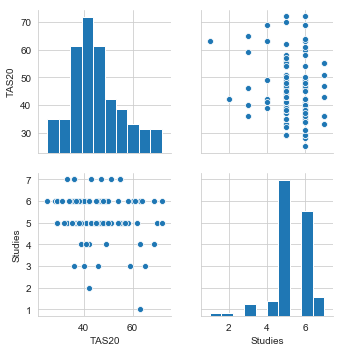

In [57]:
sns.pairplot(tas_df[["TAS20", "Studies"]])

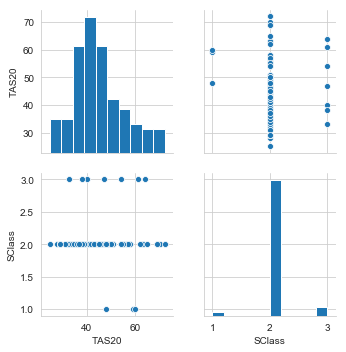

In [58]:
sns.pairplot(tas_df[["TAS20", "SClass"]])

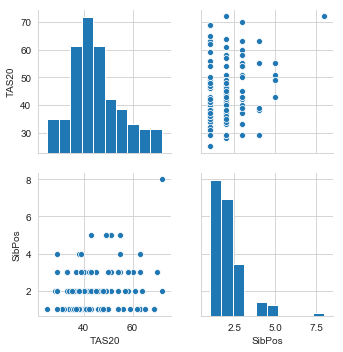

In [59]:
sns.pairplot(tas_df[["TAS20", "SibPos"]])

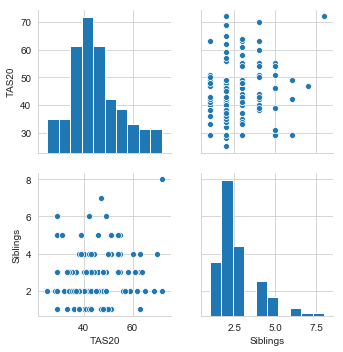

In [60]:
sns.pairplot(tas_df[["TAS20", "Siblings"]])

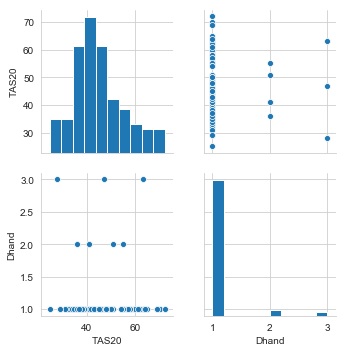

In [61]:
sns.pairplot(tas_df[["TAS20", "Dhand"]])